In [13]:
import csv

In [16]:
y = []
x = []

with open('sign_mnist_train.csv', 'rt') as f:
    reader = csv.reader(f)
    print(next(reader))
    for row in reader:
        y.append(row[0])
        x.append(np.array(row[1:]).reshape(28, 28, 1))
        
y = np.array(y)
X = np.array([z for z in x])
        

['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

In [18]:
y.shape

(27455,)

In [53]:
x_train = X[:5000]
y_train = y[:5000]
x_validate = X[-2000:-1000]
y_validate = y[-2000:-1000]

In [111]:
from tensorflow import keras

def build_pooling_model():
    model = keras.Sequential([
        keras.layers.Conv2D(
            4, 
            activation='relu',
            kernel_size=3,
            padding='same',
            input_shape=(28, 28, 1),
        ),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(
            8, 
            activation='relu',
            kernel_size=3,
        ),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(
            16, 
            activation='relu',
            kernel_size=3,
        ),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(512, activation='relu'),    
        keras.layers.Dense(25, activation='softmax'),    
    ])
    model.compile(
        optimizer='adam', 
        metrics=['accuracy'], 
        loss='sparse_categorical_crossentropy',
    )
    return model

In [126]:
model = build_pooling_model()

In [127]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
5000/5000 [==============================] - 3s 529us/sample - loss: 2.0757 - acc: 0.3920
Epoch 2/3
5000/5000 [==============================] - 2s 482us/sample - loss: 0.8288 - acc: 0.7380
Epoch 3/3
5000/5000 [==============================] - 2s 478us/sample - loss: 0.4832 - acc: 0.8534


In [68]:
y_validate = np.array(y_validate, dtype=int)

In [128]:
predicted = np.array([np.argmax(x) for x in model.predict(x_validate)])
(predicted == y_validate).sum()

906

In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation_producer = ImageDataGenerator(
    width_shift_range=0.1, 
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2,
)
augmentation_gen = data_augmentation_producer.flow(x_train, shuffle=False, batch_size=5000, seed=10)

In [139]:
model.fit(next(augmentation_gen), y_train, epochs=3)

Epoch 1/3
5000/5000 [==============================] - 1s 285us/sample - loss: 0.5117 - acc: 0.8278
Epoch 2/3
5000/5000 [==============================] - 1s 280us/sample - loss: 0.4374 - acc: 0.8486
Epoch 3/3
5000/5000 [==============================] - 1s 281us/sample - loss: 0.3760 - acc: 0.8762


In [131]:
predicted = np.array([np.argmax(x) for x in model.predict(x_validate)])
(predicted == y_validate).sum()

770

In [133]:
predicted = np.array([np.argmax(x) for x in model.predict(x_validate)])
(predicted == y_validate).sum()

847

In [136]:
predicted = np.array([np.argmax(x) for x in model.predict(x_validate)])
(predicted == y_validate).sum()

891

In [140]:
predicted = np.array([np.argmax(x) for x in model.predict(x_validate)])
(predicted == y_validate).sum()

939

In [194]:
extended_x_train = np.array([np.concatenate([x] * 3, axis=-1) for x in x_train])

In [195]:
extended_x_train = np.array([resize(x, (32, 32), preserve_range=True) for x in np.array(extended_x_train, int)])

In [200]:
from tensorflow.keras.applications import VGG16
vgg = VGG16(input_shape=(32, 32, 3), include_top=False, pooling='max')
for layer in vgg.layers:
    layer.trainable = False
pretrained_model = keras.Sequential([
    vgg,
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(25, activation='sigmoid')
])
pretrained_model.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss='sparse_categorical_crossentropy',
)


In [201]:
pretrained_model.fit(extended_x_train, y_train, epochs=3)

Epoch 1/3
5000/5000 [==============================] - 15s 3ms/sample - loss: 1.4689 - acc: 0.6774
Epoch 2/3
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.3307 - acc: 0.9572
Epoch 3/3
5000/5000 [==============================] - 15s 3ms/sample - loss: 0.1331 - acc: 0.9924


In [202]:
extended_x_validate = np.array([np.concatenate([x] * 3, axis=-1) for x in x_validate])
extended_x_validate = np.array([resize(x, (32, 32), preserve_range=True) for x in np.array(extended_x_validate, int)])

In [203]:
predicted = np.array([np.argmax(x) for x in pretrained_model.predict(extended_x_validate)])
(predicted == y_validate).sum()

983

In [153]:
%matplotlib inline

In [155]:
import matplotlib.pyplot as plt

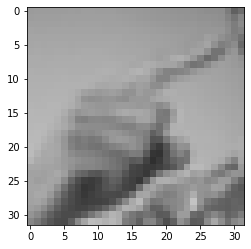

In [196]:
plt.imshow(np.array(extended_x_train[1], dtype=int))

In [193]:
extended_x_train

array([[[[2.99788042e-15, 2.99788042e-15, 2.99788042e-15],
         [3.22467349e-15, 3.22467349e-15, 3.22467349e-15],
         [3.45125057e-15, 3.45125057e-15, 3.45125057e-15],
         ...,
         [4.71556794e-15, 4.71556794e-15, 4.71556794e-15],
         [4.71038410e-15, 4.71038410e-15, 4.71038410e-15],
         [4.68964873e-15, 4.68964873e-15, 4.68964873e-15]],

        [[3.07952592e-15, 3.07952592e-15, 3.07952592e-15],
         [3.29076747e-15, 3.29076747e-15, 3.29076747e-15],
         [3.49920110e-15, 3.49920110e-15, 3.49920110e-15],
         ...,
         [4.73630331e-15, 4.73630331e-15, 4.73630331e-15],
         [4.73111947e-15, 4.73111947e-15, 4.73111947e-15],
         [4.71038410e-15, 4.71038410e-15, 4.71038410e-15]],

        [[3.13795214e-15, 3.13795214e-15, 3.13795214e-15],
         [3.34530580e-15, 3.34530580e-15, 3.34530580e-15],
         [3.54920357e-15, 3.54920357e-15, 3.54920357e-15],
         ...,
         [4.74148715e-15, 4.74148715e-15, 4.74148715e-15],
         [

In [165]:
a = next(
    ImageDataGenerator(rescale=32/28).flow(extended_x_train, shuffle=False, seed=54, batch_size=5000)
)

In [166]:
a.shape

(5000, 28, 28, 3)

In [170]:
from skimage.transform import resize

In [189]:
a = 

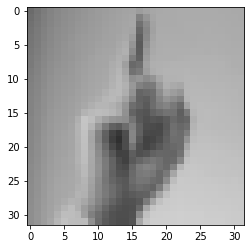

In [190]:
plt.imshow(np.array(a[0], dtype=int))

In [181]:
a.shape

(5000, 32, 32, 3)

In [185]:
x_train_2 = np.array(extended_x_train, int)



In [188]:
resize(x_train_2[0], (32, 32), preserve_range=True)

array([[[107.93359375, 107.93359375, 107.93359375],
        [116.13671875, 116.13671875, 116.13671875],
        [124.33203125, 124.33203125, 124.33203125],
        ...,
        [170.0625    , 170.0625    , 170.0625    ],
        [169.875     , 169.875     , 169.875     ],
        [169.125     , 169.125     , 169.125     ]],

       [[110.88671875, 110.88671875, 110.88671875],
        [118.52734375, 118.52734375, 118.52734375],
        [126.06640625, 126.06640625, 126.06640625],
        ...,
        [170.8125    , 170.8125    , 170.8125    ],
        [170.625     , 170.625     , 170.625     ],
        [169.875     , 169.875     , 169.875     ]],

       [[113.        , 113.        , 113.        ],
        [120.5       , 120.5       , 120.5       ],
        [127.875     , 127.875     , 127.875     ],
        ...,
        [171.        , 171.        , 171.        ],
        [170.94140625, 170.94140625, 170.94140625],
        [170.70703125, 170.70703125, 170.70703125]],

       ...,

      